https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [1]:
import os

In [2]:
os.chdir('C:\\Users\\18959\\Downloads')

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [20]:
train_df.info()
print("-------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   

In [22]:
train_df.describe([.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,max
PassengerId,891.0,446.000000,257.353842,1.00,90.00,179.0000,268.00,357.0,446.0000,535.0000,624.0,713.0000,802.0000,882.10000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.00,0.0000,0.00,0.0,0.0000,0.0000,1.0,1.0000,1.0000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.00,1.0000,2.00,2.0,3.0000,3.0000,3.0,3.0000,3.0000,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,14.00,19.0000,22.00,25.0,28.0000,31.8000,36.0,41.0000,50.0000,65.87000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.00,0.0000,0.00,0.0,0.0000,0.0000,1.0,1.0000,1.0000,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.00,0.0000,0.00,0.0,0.0000,0.0000,0.0,1.0000,2.0000,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.55,7.8542,8.05,10.5,14.4542,21.6792,27.0,39.6875,77.9583,249.00622,512.3292


In [23]:
train_df.describe(include=['O']) # 非数值型数据

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",male,1601,B96 B98,S
freq,1,577,7,4,644


In [20]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [21]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


女性，以及Placss1的富人有更高的生存率

In [47]:
is_survived=train_df[train_df['Survived']==1]  # 存活的

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

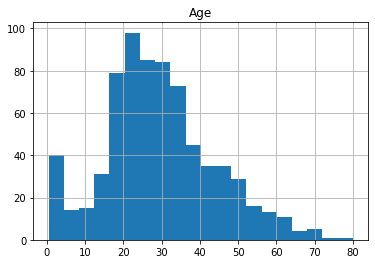

In [25]:
train_df.hist(column='Age',bins=20)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

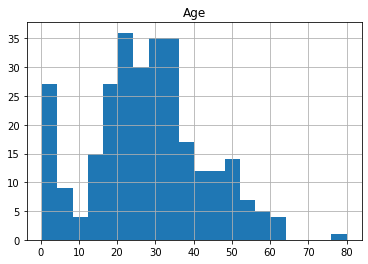

In [49]:
is_survived.hist(column='Age',bins=20)

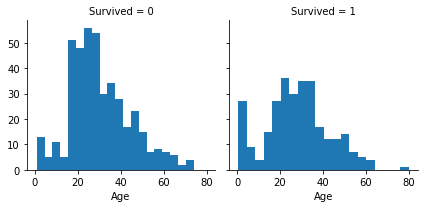

In [26]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\18959\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


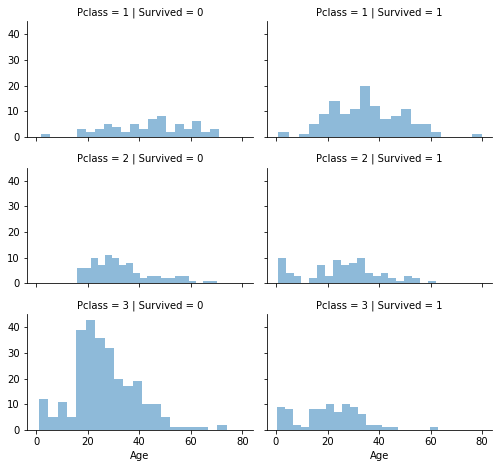

In [50]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

In [60]:
train_df[train_df['Survived']==1]

1      1
2      1
3      1
8      1
9      1
      ..
875    1
879    1
880    1
887    1
889    1
Name: Survived, Length: 342, dtype: int64

对于姓名，sibling变量不是直接除去，而是创造新变量，如是否为single，然后再删除原来的

In [61]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)